In [1]:
import numpy as np
import cv2
import IPython
import handshape_datasets as hd
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# if input image is in range 0..1, please first multiply img by 255
# assume image is ndarray of shape [height, width, channels] where channels can be 1, 3 or 4
def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [3]:

DATASET_NAME = "rwth"

data = hd.load(DATASET_NAME)

Reading images


In [4]:
data

(array([[[[158, 166, 173],
          [158, 166, 173],
          [158, 166, 173],
          ...,
          [ 41,  22,   8],
          [ 62,  43,  29],
          [ 52,  39,  32]],
 
         [[157, 165, 172],
          [157, 165, 172],
          [157, 165, 172],
          ...,
          [ 40,  21,   7],
          [ 61,  42,  28],
          [ 47,  34,  27]],
 
         [[156, 164, 171],
          [156, 164, 171],
          [156, 164, 171],
          ...,
          [ 45,  25,  16],
          [ 54,  34,  25],
          [ 49,  33,  29]],
 
         ...,
 
         [[184, 193, 204],
          [184, 193, 204],
          [184, 193, 204],
          ...,
          [ 43,  38,  26],
          [ 43,  38,  26],
          [ 40,  37,  24]],
 
         [[184, 194, 202],
          [184, 194, 202],
          [184, 194, 202],
          ...,
          [ 40,  37,  24],
          [ 41,  38,  25],
          [ 35,  32,  19]],
 
         [[185, 195, 203],
          [185, 195, 203],
          [185, 195, 203],
   

In [5]:
data[0].shape

(3359, 132, 92, 3)

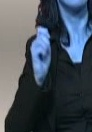

In [6]:
imshow(data[0][0])

In [7]:
data[1]['y']

array([43, 43,  8, ..., 24, 24, 24])

In [8]:
np.unique(data[1]['y'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [9]:
n_unique = len(np.unique(data[1]['y']))
n_unique

45

In [10]:
np.equal(43,data[1]['y'])

array([ True,  True, False, ..., False, False, False])

class: 0,size: 529


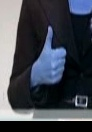

class: 1,size: 321


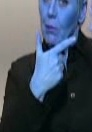

class: 2,size: 152


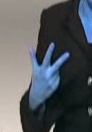

class: 3,size: 8


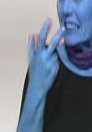

class: 4,size: 21


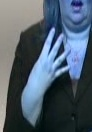

class: 5,size: 349


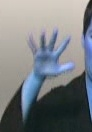

class: 6,size: 46


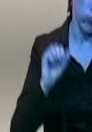

class: 7,size: 36


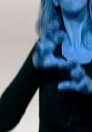

class: 8,size: 197


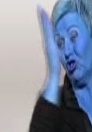

class: 9,size: 30


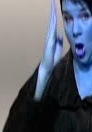

class: 10,size: 113


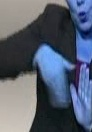

class: 11,size: 7


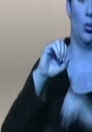

class: 12,size: 29


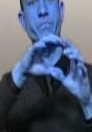

class: 13,size: 15


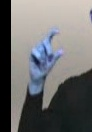

class: 14,size: 9


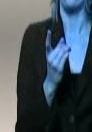

class: 15,size: 18


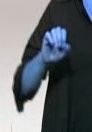

class: 16,size: 333


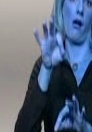

class: 17,size: 5


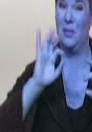

class: 18,size: 11


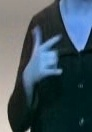

class: 19,size: 5


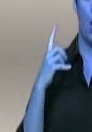

class: 20,size: 12


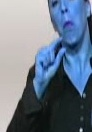

class: 21,size: 37


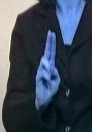

class: 22,size: 1


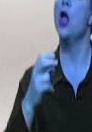

class: 23,size: 6


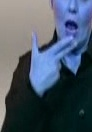

class: 24,size: 7


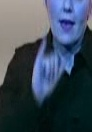

class: 25,size: 401


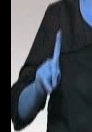

class: 26,size: 15


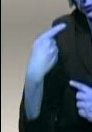

class: 27,size: 24


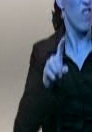

class: 28,size: 309


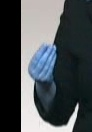

class: 29,size: 7


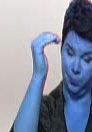

class: 30,size: 2


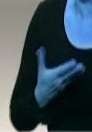

class: 31,size: 14


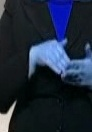

class: 32,size: 5


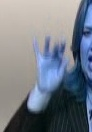

class: 33,size: 7


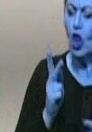

class: 34,size: 23


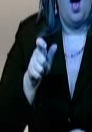

class: 35,size: 13


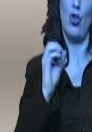

class: 36,size: 6


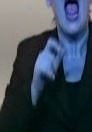

class: 37,size: 88


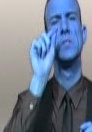

class: 38,size: 2


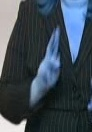

class: 39,size: 103


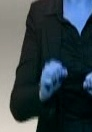

class: 40,size: 24


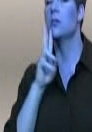

class: 41,size: 5


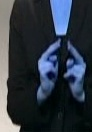

class: 42,size: 4


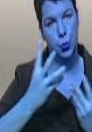

class: 43,size: 9


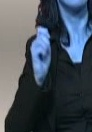

class: 44,size: 1


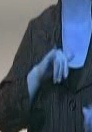

In [11]:
good_min = 20
good_classes = []
for i in range(n_unique):
    images = data[0][np.equal(i,data[1]['y'])]
    print("class: " + str(i) + ",size: " + str(len(images)))
    imshow(images[0])
    if len(images) >= good_min:
        good_classes = good_classes + [i]

In [12]:
good_classes

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 16, 21, 25, 27, 28, 34, 37, 39, 40]

In [13]:
len(good_classes)

20

In [14]:
good_x = data[0][np.in1d(data[1]['y'], good_classes)]

In [15]:
good_y = data[1]['y'][np.in1d(data[1]['y'], good_classes)]

In [16]:
good_x

array([[[[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [158, 129, 107],
         [151, 122, 100],
         [149, 130, 116]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [162, 133, 111],
         [151, 122, 100],
         [144, 125, 111]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [170, 137, 112],
         [158, 125, 100],
         [148, 126, 108]],

        ...,

        [[192, 195, 204],
         [192, 195, 204],
         [192, 195, 204],
         ...,
         [ 44,  37,  35],
         [ 49,  42,  40],
         [ 54,  39,  30]],

        [[193, 196, 203],
         [193, 196, 203],
         [193, 196, 203],
         ...,
         [ 44,  39,  36],
         [ 48,  43,  40],
         [ 52,  46,  39]],

        [[195, 198, 205],
         [195, 198, 205],
         [195, 198, 205],
         ...,
         [ 44,  39,  36],
        

In [17]:
good_y

array([8, 8, 8, ..., 5, 5, 5])

In [24]:
my_dict = dict(zip(np.unique(good_y), range(len(np.unique(good_y)))))
my_dict

{0: 0,
 1: 1,
 2: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 12: 10,
 16: 11,
 21: 12,
 25: 13,
 27: 14,
 28: 15,
 34: 16,
 37: 17,
 39: 18,
 40: 19}

In [25]:
np.vectorize(my_dict.get)(good_y)

array([7, 7, 7, ..., 4, 4, 4])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
rotation_range=10
width_shift_range=0.10
height_shift_range=0.10
horizontal_flip=True
batch_size = 16


features = good_x
labels = good_y
n_classes = len(np.unique(labels))
image_shape = np.shape(features)[1:]

x_train, x_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.33,
                                                    random_state=42)
x_train, x_test = x_train / 255.0, x_test / 255.0

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    horizontal_flip=horizontal_flip)
datagen.fit(x_train)

train_gen =  datagen.flow(x_train, y_train, batch_size=batch_size)

batches = 0
for images, labels in train_gen:
    print(images)
    batches += 1
    if batches >= len(x_train) / batch_size:
        # we need to break the loop by hand because
        # the generator loops indefinitely
        break

[[[[-0.99170035 -1.0431302  -0.9816116 ]
   [-0.9709023  -0.9733279  -0.88418543]
   [-0.96465546 -0.9838108  -0.88093394]
   ...
   [ 1.1627259   1.7036207   1.7487262 ]
   [ 1.1614455   1.7021881   1.7473934 ]
   [ 1.160165    1.7007556   1.7460604 ]]

  [[-0.99426156 -1.0517257  -0.99360883]
   [-0.9709023  -0.9733279  -0.88418543]
   [-0.9672166  -0.979513   -0.882267  ]
   ...
   [ 1.1491433   1.6884254   1.7345872 ]
   [ 1.1478627   1.6869926   1.733254  ]
   [ 1.1465822   1.6855601   1.7319211 ]]

  [[-0.99682266 -1.0603213  -1.0056062 ]
   [-0.9709023  -0.9733279  -0.88418543]
   [-0.9697777  -0.9752152  -0.88360006]
   ...
   [ 1.1355606   1.6732299   1.7204478 ]
   [ 1.1342801   1.6717974   1.7191149 ]
   [ 1.1329994   1.6703646   1.7177817 ]]

  ...

  [[-1.0303622  -0.92556256 -0.8825463 ]
   [-1.0573634  -0.9088777  -0.8384167 ]
   [-1.0419217  -0.8919571  -0.8226722 ]
   ...
   [ 0.7208235   1.1787252   1.2461108 ]
   [ 0.7208235   1.1787252   1.2461108 ]
   [ 0.7208235  

[[[[ 1.4438999   1.9266019   1.9278057 ]
   [ 1.4438999   1.9266019   1.9278057 ]
   [ 1.4438999   1.9266019   1.9278057 ]
   ...
   [ 1.4955033   1.950933    1.9761754 ]
   [ 1.4711858   1.9418646   1.9846135 ]
   [ 1.460309    1.9296966   1.9732912 ]]

  [[ 1.4438999   1.9266019   1.9278057 ]
   [ 1.4438999   1.9266019   1.9278057 ]
   [ 1.4438999   1.9266019   1.9278057 ]
   ...
   [ 1.4920241   1.9496355   1.9773828 ]
   [ 1.4711858   1.9418646   1.9846135 ]
   [ 1.4579896   1.9271016   1.9708766 ]]

  [[ 1.4438999   1.9266019   1.9278057 ]
   [ 1.4438999   1.9266019   1.9278057 ]
   [ 1.4438999   1.9266019   1.9278057 ]
   ...
   [ 1.4885451   1.9483382   1.97859   ]
   [ 1.4711858   1.9418646   1.9846135 ]
   [ 1.4556704   1.924507    1.9684622 ]]

  ...

  [[-0.21195349 -0.59643495 -0.12918745]
   [-0.16969846 -0.5959313  -0.10695981]
   [-0.2377299  -0.65108925 -0.1582841 ]
   ...
   [-1.1199173  -0.98740757 -0.9540944 ]
   [-1.1211671  -0.9888057  -0.9553954 ]
   [-1.1216118  

[[[[-7.6625812e-01 -7.2912323e-01 -5.1493406e-01]
   [-7.6625812e-01 -7.2912323e-01 -5.1493406e-01]
   [-7.6625812e-01 -7.2912323e-01 -5.1493406e-01]
   ...
   [ 1.3345358e+00  1.9568808e+00  2.0695958e+00]
   [ 1.3211133e+00  1.9418646e+00  2.0556233e+00]
   [ 1.3211133e+00  1.9418646e+00  2.0556233e+00]]

  [[-7.6625812e-01 -7.2912323e-01 -5.1493406e-01]
   [-7.6625812e-01 -7.2912323e-01 -5.1493406e-01]
   [-7.6625812e-01 -7.2912323e-01 -5.1493406e-01]
   ...
   [ 1.3339894e+00  1.9562695e+00  2.0690269e+00]
   [ 1.3211133e+00  1.9418646e+00  2.0556233e+00]
   [ 1.3211133e+00  1.9418646e+00  2.0556233e+00]]

  [[-7.6625812e-01 -7.2912323e-01 -5.1493406e-01]
   [-7.6625812e-01 -7.2912323e-01 -5.1493406e-01]
   [-7.6625812e-01 -7.2912323e-01 -5.1493406e-01]
   ...
   [ 1.3334432e+00  1.9556583e+00  2.0684583e+00]
   [ 1.3211133e+00  1.9418646e+00  2.0556233e+00]
   [ 1.3211133e+00  1.9418646e+00  2.0556233e+00]]

  ...

  [[-9.1132653e-01 -8.8416725e-01 -9.3128777e-01]
   [-9.1351205e-

[[[[ 1.0813626e+00  4.3640193e-01  1.3200332e-01]
   [ 1.0756425e+00  4.2974660e-01  1.2652501e-01]
   [ 1.1101682e+00  4.6091950e-01  2.3572621e-01]
   ...
   [-1.3801908e+00 -1.2938464e+00 -1.1256189e+00]
   [-1.3801908e+00 -1.2938464e+00 -1.1256189e+00]
   [-1.3801908e+00 -1.2938464e+00 -1.1256189e+00]]

  [[ 7.5832582e-01  6.0708452e-02 -1.7765352e-01]
   [ 7.5741065e-01  5.9684545e-02 -1.7860626e-01]
   [ 6.7589396e-01  2.8752806e-03 -1.2481348e-01]
   ...
   [-1.3801908e+00 -1.2938464e+00 -1.1256189e+00]
   [-1.3801908e+00 -1.2938464e+00 -1.1256189e+00]
   [-1.3801908e+00 -1.2938464e+00 -1.1256189e+00]]

  [[ 7.3025739e-01  2.6438909e-02 -2.0865153e-01]
   [ 7.3643535e-01  3.2582358e-02 -2.0269692e-01]
   [ 5.7560092e-01 -1.1126422e-01 -2.3103276e-01]
   ...
   [-1.3801908e+00 -1.2938464e+00 -1.1256189e+00]
   [-1.3801908e+00 -1.2938464e+00 -1.1256189e+00]
   [-1.3801908e+00 -1.2938464e+00 -1.1256189e+00]]

  ...

  [[-9.5725942e-01 -8.9701390e-01 -9.2679131e-01]
   [-9.5725942e-

[[[[ 1.0019052   1.4891769   1.602968  ]
   [ 1.0035796   1.4950532   1.5972608 ]
   [ 1.0037565   1.495251    1.5769204 ]
   ...
   [ 0.33563238  0.2593909   0.00721985]
   [ 0.35404837  0.2799934   0.02639044]
   [ 0.37246424  0.30059582  0.04556091]]

  [[ 0.98910767  1.4767325   1.5861603 ]
   [ 0.99003965  1.4799056   1.5831661 ]
   [ 0.98018134  1.4688768   1.5488936 ]
   ...
   [ 0.21863465  0.1499416  -0.10127218]
   [ 0.22867972  0.15556045 -0.0943011 ]
   [ 0.23872468  0.16117932 -0.08733003]]

  [[ 0.97505563  1.4628853   1.568047  ]
   [ 0.97649974  1.4647582   1.5690714 ]
   [ 0.970385    1.4518564   1.5314505 ]
   ...
   [ 0.20653042  0.16074893 -0.09876815]
   [ 0.1981595   0.15138412 -0.10748208]
   [ 0.18978868  0.14201944 -0.11619589]]

  ...

  [[-1.0118312  -0.8817511  -0.76635504]
   [-1.0118312  -0.8817511  -0.78477156]
   [-1.0118312  -0.8817511  -0.78477156]
   ...
   [-1.066403   -0.92753947 -0.9267913 ]
   [-1.066403   -0.92753947 -0.9267913 ]
   [-1.066403   

[[[[ 1.0212896   0.40068242 -0.10274241]
   [ 1.0394022   0.4209456  -0.08388756]
   [ 1.057515    0.44120872 -0.06503282]
   ...
   [ 1.0755402   1.5297694   1.6153622 ]
   [ 1.0755402   1.5297694   1.6153622 ]
   [ 1.0755402   1.5297694   1.6153622 ]]

  [[ 0.9336653   0.3474165  -0.12106796]
   [ 0.9472497   0.35248223 -0.12342484]
   [ 0.9608342   0.35754797 -0.12578173]
   ...
   [ 1.0755402   1.5297694   1.6153622 ]
   [ 1.0755402   1.5297694   1.6153622 ]
   [ 1.0755402   1.5297694   1.6153622 ]]

  [[ 0.7842467   0.19654636 -0.2500845 ]
   [ 0.8136797   0.22947386 -0.2194455 ]
   [ 0.8431125   0.2624015  -0.18880646]
   ...
   [ 1.0755402   1.5297694   1.6153622 ]
   [ 1.0755402   1.5297694   1.6153622 ]
   [ 1.0755402   1.5297694   1.6153622 ]]

  ...

  [[-0.23770452 -0.38882935 -0.6364146 ]
   [-0.49958387 -0.6444656  -0.7770078 ]
   [-0.6882108  -0.79651016 -0.9665039 ]
   ...
   [ 0.83254015  1.2579178   1.3340012 ]
   [ 0.830276    1.2553848   1.3316443 ]
   [ 0.82801193 

[[[[ 0.8845389   1.3618788   1.4449384 ]
   [ 0.8845389   1.3618788   1.4449384 ]
   [ 0.8845389   1.3618788   1.4449384 ]
   ...
   [ 0.8736122   1.3741027   1.4221897 ]
   [ 0.870896    1.3771415   1.4165345 ]
   [ 0.881669    1.3650893   1.4165345 ]]

  [[ 0.8845389   1.3618788   1.4449384 ]
   [ 0.8845389   1.3618788   1.4449384 ]
   [ 0.8845389   1.3618788   1.4449384 ]
   ...
   [ 0.87216705  1.3757194   1.4191808 ]
   [ 0.870896    1.3771415   1.4165345 ]
   [ 0.8831144   1.3634723   1.4165345 ]]

  [[ 0.8845389   1.3618788   1.4449384 ]
   [ 0.8845389   1.3618788   1.4449384 ]
   [ 0.8845389   1.3618788   1.4449384 ]
   ...
   [ 0.870896    1.3771415   1.4165345 ]
   [ 0.8709934   1.3770325   1.4165345 ]
   [ 0.8845389   1.3618788   1.4165345 ]]

  ...

  [[-1.025026   -0.97282636 -0.99733466]
   [-0.868059   -0.7972226  -0.86124676]
   [-1.0052117  -0.9506595  -1.0051124 ]
   ...
   [-1.0115229  -0.86545366 -0.86902064]
   [-1.0100776  -0.86060315 -0.8645073 ]
   [-1.0086324  

[[[[ 6.08362615e-01  1.06817460e+00  1.10063791e+00]
   [ 6.07700229e-01  1.06743360e+00  1.09994829e+00]
   [ 6.07037604e-01  1.06669223e+00  1.09925854e+00]
   ...
   [ 5.73328257e-01  2.96366751e-01 -4.35860828e-02]
   [ 4.32226270e-01  1.62706614e-01 -1.22929558e-01]
   [ 3.39204878e-01  8.02340880e-02 -1.59484968e-01]]

  [[ 5.98036945e-01  1.05662298e+00  1.08988905e+00]
   [ 5.98036945e-01  1.05662298e+00  1.08988905e+00]
   [ 5.98036945e-01  1.05662298e+00  1.08988905e+00]
   ...
   [ 4.70050603e-01  1.98033482e-01 -1.19074166e-01]
   [ 3.05050135e-01  3.68963256e-02 -2.35088021e-01]
   [ 1.94337204e-01 -6.16626106e-02 -2.91519433e-01]]

  [[ 5.98036945e-01  1.05662298e+00  1.08988905e+00]
   [ 5.95920026e-01  1.05425465e+00  1.08768547e+00]
   [ 5.93426943e-01  1.05146551e+00  1.08509016e+00]
   ...
   [ 2.60115266e-01 -2.35086661e-02 -3.12825173e-01]
   [ 1.07123055e-01 -1.74917594e-01 -4.29209799e-01]
   [ 8.18897597e-03 -2.59557992e-01 -4.75660473e-01]]

  ...

  [[-1.06640

[[[[ 0.15041427 -0.3080699  -0.19550578]
   [ 0.15291332 -0.30434236 -0.19333798]
   [ 0.15541224 -0.3006148  -0.19117016]
   ...
   [ 1.143755    1.6060833   1.657968  ]
   [ 1.143755    1.6060833   1.657968  ]
   [ 1.143755    1.6060833   1.657968  ]]

  [[ 0.06184876 -0.4284689  -0.27778208]
   [ 0.06226532 -0.42800295 -0.27734852]
   [ 0.06268178 -0.427537   -0.27691495]
   ...
   [ 1.1320019   1.5929347   1.6457334 ]
   [ 1.1321406   1.59309     1.645878  ]
   [ 1.1322793   1.5932451   1.6460222 ]]

  [[ 0.14650954 -0.38058922 -0.1242857 ]
   [ 0.14525998 -0.3813658  -0.1264535 ]
   [ 0.1440105  -0.38214236 -0.12862131]
   ...
   [ 1.130112    1.5908206   1.6437662 ]
   [ 1.130112    1.5908206   1.6437662 ]
   [ 1.130112    1.5908206   1.6437662 ]]

  ...

  [[-0.9572594  -0.79017437 -0.69955975]
   [-0.9572594  -0.79017437 -0.69955975]
   [-0.9572594  -0.79017437 -0.69955975]
   ...
   [ 1.7563735   2.3677526   2.238881  ]
   [ 1.8069996   2.4243894   2.2915814 ]
   [ 1.7752777  

[[[[ 1.9473045   1.7471176   1.0506973 ]
   [ 1.8173455   1.6635193   1.0157763 ]
   [ 1.811023    1.8336418   1.2874296 ]
   ...
   [ 0.5906282   1.0330718   1.1389847 ]
   [ 0.59119445  1.0337052   1.1395742 ]
   [ 0.59176046  1.0343385   1.1401633 ]]

  [[ 1.6283576   1.4782803   0.84390473]
   [ 1.6165129   1.5212505   0.92263013]
   [ 1.4833525   1.5445635   1.066517  ]
   ...
   [ 0.6042595   1.0483215   1.1531745 ]
   [ 0.60482556  1.0489547   1.1537638 ]
   [ 0.60539156  1.049588    1.154353  ]]

  [[ 1.1877563   1.0142719   0.4255945 ]
   [ 1.1831791   1.0500519   0.48879066]
   [ 0.97252214  0.9871619   0.5565906 ]
   ...
   [ 0.6178906   1.0635711   1.1673641 ]
   [ 0.61845684  1.0642045   1.1679536 ]
   [ 0.61902285  1.0648377   1.1685429 ]]

  ...

  [[-1.3801908  -1.2938464  -1.1256189 ]
   [-1.3801908  -1.2938464  -1.1256189 ]
   [-1.3801908  -1.2938464  -1.1256189 ]
   ...
   [-1.3801908  -1.2938464  -1.1256189 ]
   [-1.3801908  -1.2938464  -1.1256189 ]
   [-1.3801908  

[[[[-6.7113215e-01 -5.3112620e-01 -4.4431424e-01]
   [-6.7124230e-01 -5.3206307e-01 -4.4417652e-01]
   [-6.7247659e-01 -5.3551525e-01 -4.4481900e-01]
   ...
   [ 5.7075107e-01  1.0108346e+00  1.0898890e+00]
   [ 5.7075107e-01  1.0108346e+00  1.0898890e+00]
   [ 5.7075107e-01  1.0108346e+00  1.0898890e+00]]

  [[-6.8512195e-01 -5.4677701e-01 -4.5887727e-01]
   [-6.8414402e-01 -5.4568297e-01 -4.5785928e-01]
   [-6.8352681e-01 -5.4499251e-01 -4.5721680e-01]
   ...
   [ 5.7074583e-01  1.0108287e+00  1.0898837e+00]
   [ 5.7075107e-01  1.0108346e+00  1.0898890e+00]
   [ 5.7075107e-01  1.0108346e+00  1.0898890e+00]]

  [[-7.1237987e-01 -5.7727128e-01 -4.8725212e-01]
   [-7.1114558e-01 -5.7589042e-01 -4.8596722e-01]
   [-7.0991123e-01 -5.7450956e-01 -4.8468232e-01]
   ...
   [ 5.5711687e-01  9.9558157e-01  1.0756962e+00]
   [ 5.5773407e-01  9.9627209e-01  1.0763388e+00]
   [ 5.5835134e-01  9.9696261e-01  1.0769813e+00]]

  ...

  [[ 1.1246651e+00  4.7598350e-01  5.8958154e-02]
   [ 9.2198086e-

[[[[ 0.5845749   0.01895575 -0.37272593]
   [ 0.6401426   0.04526669 -0.38637212]
   [ 0.6871679   0.02689025 -0.47895882]
   ...
   [ 0.6662517   1.1176741   1.1893029 ]
   [ 0.6662517   1.1176741   1.1893029 ]
   [ 0.6662517   1.1176741   1.1893029 ]]

  [[ 0.5940375   0.067019   -0.33117354]
   [ 0.58485013  0.05508959 -0.3638556 ]
   [ 0.626891    0.03873768 -0.4478155 ]
   ...
   [ 0.6621109   1.1130416   1.1849924 ]
   [ 0.6604124   1.1111414   1.1832243 ]
   [ 0.6587139   1.1092414   1.1814562 ]]

  [[ 0.5935283   0.19686286 -0.22138599]
   [ 0.53018045  0.11674196 -0.30085754]
   [ 0.5829243   0.07816031 -0.38864622]
   ...
   [ 0.65260875  1.1024113   1.1751009 ]
   [ 0.65260875  1.1024113   1.1751009 ]
   [ 0.65260875  1.1024113   1.1751009 ]]

  ...

  [[-1.2164755  -1.0801674  -1.1256189 ]
   [-1.2164755  -1.0801674  -1.1256189 ]
   [-1.2164755  -1.0801674  -1.1256189 ]
   ...
   [-1.1482607  -1.0038534  -0.9267913 ]
   [-1.1403074  -0.9949558  -0.9185121 ]
   [-1.1346178  

[[[[ 1.18468380e+00  1.63660884e+00  1.65796804e+00]
   [ 1.18468380e+00  1.63660884e+00  1.65796804e+00]
   [ 1.18468380e+00  1.63660884e+00  1.65796804e+00]
   ...
   [ 1.25232089e+00  1.65122545e+00  1.72837663e+00]
   [ 1.23874271e+00  1.63603508e+00  1.71424198e+00]
   [ 1.22606087e+00  1.62184751e+00  1.70104063e+00]]

  [[ 1.16777146e+00  1.61768854e+00  1.64036274e+00]
   [ 1.17042589e+00  1.62065816e+00  1.64312601e+00]
   [ 1.17308056e+00  1.62362802e+00  1.64588940e+00]
   ...
   [ 1.25099361e+00  1.64974046e+00  1.72699487e+00]
   [ 1.23741531e+00  1.63455009e+00  1.71286035e+00]
   [ 1.22738814e+00  1.62333238e+00  1.70242226e+00]]

  [[ 1.15739787e+00  1.60608327e+00  1.62956417e+00]
   [ 1.15739787e+00  1.60608327e+00  1.62956417e+00]
   [ 1.15739787e+00  1.60608327e+00  1.62956417e+00]
   ...
   [ 1.24966645e+00  1.64825583e+00  1.72561336e+00]
   [ 1.23608828e+00  1.63306546e+00  1.71147883e+00]
   [ 1.22871554e+00  1.62481737e+00  1.70380402e+00]]

  ...

  [[-1.18880

[[[[-0.7389722  -0.86648834 -1.1256189 ]
   [-0.7389722  -0.86648834 -1.1256189 ]
   [-0.7389722  -0.86648834 -1.1256189 ]
   ...
   [ 1.2800496   1.7280347   1.7856455 ]
   [ 1.2912194   1.7405307   1.8148379 ]
   [ 1.2553803   1.7004364   1.7883692 ]]

  [[-0.7389722  -0.86648834 -1.1256189 ]
   [-0.7389722  -0.86648834 -1.1256189 ]
   [-0.7389722  -0.86648834 -1.1256189 ]
   ...
   [ 1.3019563   1.7467738   1.7977146 ]
   [ 1.2933512   1.7418097   1.8147496 ]
   [ 1.2614177   1.7071906   1.7933757 ]]

  [[-0.730884   -0.8574399  -1.1256189 ]
   [-0.7318661  -0.8585385  -1.1256189 ]
   [-0.73284817 -0.85963714 -1.1256189 ]
   ...
   [ 1.3146143   1.7361778   1.7648185 ]
   [ 1.2947906   1.7372719   1.7874908 ]
   [ 1.2597315   1.7053043   1.7644948 ]]

  ...

  [[-1.3801908  -1.2938464  -1.1256189 ]
   [-1.3801908  -1.2938464  -1.1256189 ]
   [-1.3801908  -1.2938464  -1.1256189 ]
   ...
   [-1.3801908  -1.2938464  -1.1256189 ]
   [-1.3801908  -1.2938464  -1.1256189 ]
   [-1.3801908  

[[[[ 0.5571081   0.94978344  0.94786936]
   [ 0.5571081   0.94978344  0.94786936]
   [ 0.55519956  0.9476483   0.9458826 ]
   ...
   [ 1.6112623   1.0240368   0.16696551]
   [ 1.5803515   0.99248177  0.14149684]
   [ 1.5470701   0.9316661   0.1259397 ]]

  [[ 0.5571081   0.94978344  0.94786936]
   [ 0.5571081   0.94978344  0.94786936]
   [ 0.5571081   0.94978344  0.94786936]
   ...
   [ 1.6189127   1.0234734   0.16431901]
   [ 1.6074634   1.0062138   0.15447117]
   [ 1.6084611   0.98125523  0.16764131]]

  [[ 0.5571081   0.94978344  0.94786936]
   [ 0.5571081   0.94978344  0.94786936]
   [ 0.5571081   0.94978344  0.94786936]
   ...
   [ 1.626966    1.0196025   0.11277682]
   [ 1.6138214   0.99390805  0.11058345]
   [ 1.6227992   0.96613127  0.14390226]]

  ...

  [[ 1.2651272   1.6960778   1.6564958 ]
   [ 1.3030903   1.7385484   1.6960145 ]
   [ 1.3438827   1.7570269   1.7132088 ]
   ...
   [ 1.4438999   1.8350252   1.7999878 ]
   [ 1.4438999   1.8350252   1.7999878 ]
   [ 1.4438999  

[[[[ 0.8399949   1.3425715   1.3843672 ]
   [ 0.8299671   1.3313532   1.3739285 ]
   [ 0.82999045  1.3313271   1.3739285 ]
   ...
   [ 0.7859983   1.2120712   1.3178154 ]
   [ 0.7737478   1.2029346   1.3078969 ]
   [ 0.7614973   1.1937978   1.2979783 ]]

  [[ 0.8299671   1.3313532   1.3739285 ]
   [ 0.82127935  1.3216338   1.3648849 ]
   [ 0.81766546  1.3175908   1.3611228 ]
   ...
   [ 0.6888226   1.1429249   1.2412027 ]
   [ 0.6956283   1.1505386   1.2482872 ]
   [ 0.7024342   1.1581526   1.2553719 ]]

  [[ 0.8232462   1.3238342   1.3669323 ]
   [ 0.8023109   1.3004133   1.3451391 ]
   [ 0.79659855  1.2940227   1.3391927 ]
   ...
   [ 0.7515445   1.2130938   1.3064946 ]
   [ 0.7542668   1.2161393   1.3093284 ]
   [ 0.7569891   1.2191849   1.3121623 ]]

  ...

  [[-1.0118312  -0.86648834 -0.8415795 ]
   [-1.0136908  -0.8685687  -0.8473867 ]
   [-1.0269291  -0.8833789  -0.88570005]
   ...
   [-1.1387485  -1.0390003  -1.0447072 ]
   [-1.1346178  -1.034379   -1.0404072 ]
   [-1.1439937  

[[[[ 0.38628998  0.03143991 -0.05917887]
   [ 0.21293284 -0.15670803 -0.259773  ]
   [ 0.01817315 -0.33737215 -0.41160247]
   ...
   [ 0.85297376  1.3265659   1.3862233 ]
   [ 0.85385245  1.3275489   1.3845907 ]
   [ 0.85515255  1.3290032   1.385944  ]]

  [[ 0.454425    0.11755754  0.0197999 ]
   [ 0.17943001 -0.19008769 -0.28320074]
   [-0.029998   -0.36921206 -0.42705998]
   ...
   [ 0.8343325   1.3057113   1.3642709 ]
   [ 0.8369331   1.3086206   1.366978  ]
   [ 0.8395334   1.3115296   1.3696848 ]]

  [[ 0.27689323  0.17450921  0.08155625]
   [ 0.03129587 -0.14637591 -0.24252711]
   [-0.09910687 -0.2849214  -0.3520623 ]
   ...
   [ 0.8254774   1.2958047   1.355053  ]
   [ 0.8228771   1.2928957   1.3523461 ]
   [ 0.82027656  1.2899865   1.349639  ]]

  ...

  [[-0.94361645 -0.85122555 -0.8983874 ]
   [-0.94361645 -0.85122555 -0.8983874 ]
   [-0.94361645 -0.85122555 -0.8983874 ]
   ...
   [ 0.95275366  1.4687182   1.5301503 ]
   [ 0.95275366  1.4687182   1.5301503 ]
   [ 0.95275366 

[[[[ 1.300813    0.84265256  0.40038025]
   [ 1.1110532   0.65373164  0.2463349 ]
   [ 1.2027613   0.8706855   0.6019114 ]
   ...
   [ 1.1028261   1.6366088   1.714776  ]
   [ 1.1028261   1.6366088   1.714776  ]
   [ 1.1028261   1.6366088   1.714776  ]]

  [[ 1.3596107   0.8901594   0.42758334]
   [ 1.127386    0.6720035   0.2633368 ]
   [ 1.1864288   0.8359688   0.54750514]
   ...
   [ 1.1028261   1.6366088   1.714776  ]
   [ 1.1028261   1.6366088   1.714776  ]
   [ 1.1028261   1.6366088   1.714776  ]]

  [[ 1.4184084   0.93766654  0.4547865 ]
   [ 1.1437187   0.6902755   0.28033882]
   [ 1.1700959   0.8012521   0.49309886]
   ...
   [ 1.1028261   1.6366088   1.714776  ]
   [ 1.1028261   1.6366088   1.714776  ]
   [ 1.1028261   1.6366088   1.714776  ]]

  ...

  [[-0.919764   -0.70112455 -0.7326662 ]
   [-0.9246638  -0.6974701  -0.72586536]
   [-0.9295636  -0.69381577 -0.7190646 ]
   ...
   [-1.0398661  -0.82153785 -0.67193544]
   [-1.0663228  -0.8165048  -0.6779936 ]
   [-1.0491586  

[[[[ 1.3046415   0.7726791   0.37979037]
   [ 1.3150444   0.77849793  0.37979037]
   [ 1.3254473   0.78431696  0.37979037]
   ...
   [ 0.733528    1.1929382   1.2593359 ]
   [ 0.7356085   1.1952657   1.2615017 ]
   [ 0.755321    1.2173187   1.2820219 ]]

  [[ 1.1122407   0.60927147  0.27597472]
   [ 1.1361672   0.636039    0.3008818 ]
   [ 1.1600938   0.6628064   0.3257888 ]
   ...
   [ 0.7208235   1.1787252   1.2461108 ]
   [ 0.7210373   1.1789644   1.2463334 ]
   [ 0.73776853  1.1976821   1.2637502 ]]

  [[ 0.73492134  0.2352172  -0.06760924]
   [ 0.77445227  0.26780364 -0.03837053]
   [ 0.81398326  0.30039018 -0.00913184]
   ...
   [ 0.71361214  1.1706576   1.238604  ]
   [ 0.7146526   1.1718216   1.2396871 ]
   [ 0.7156928   1.1729854   1.2407699 ]]

  ...

  [[-1.1209748  -1.0191162  -1.0262052 ]
   [-1.1209748  -1.0191162  -1.0262052 ]
   [-1.1209748  -1.0191162  -1.0262052 ]
   ...
   [ 1.1632327   1.6668676   1.6940037 ]
   [ 1.1897594   1.7033381   1.7342614 ]
   [ 1.18459    

[[[[ 1.1496509   0.6020373   0.21723478]
   [ 1.2353107   0.67063993  0.26206788]
   [ 1.3244222   0.713673    0.30211008]
   ...
   [ 0.77539533  1.2397764   1.3313227 ]
   [ 0.77539533  1.2397764   1.3313227 ]
   [ 0.77539533  1.2397764   1.3313227 ]]

  [[ 1.1328974   0.592666    0.21505484]
   [ 1.2248397   0.6589257   0.25116795]
   [ 1.3076688   0.7113301   0.29993004]
   ...
   [ 0.77539533  1.2397764   1.3313227 ]
   [ 0.77539533  1.2397764   1.3313227 ]
   [ 0.77539533  1.2397764   1.3313227 ]]

  [[ 1.116144    0.58329463  0.21287479]
   [ 1.2143687   0.6472116   0.24026802]
   [ 1.2909153   0.7089872   0.2977501 ]
   ...
   [ 0.77539533  1.2397764   1.3313227 ]
   [ 0.7753035   1.2396737   1.3312271 ]
   [ 0.77320945  1.237331    1.3290473 ]]

  ...

  [[ 0.32384     0.08945835 -0.183461  ]
   [ 0.41648325  0.18438987 -0.09836519]
   [ 0.46076164  0.24263749 -0.01971538]
   ...
   [-0.85241854 -0.6881485  -0.6927992 ]
   [-0.7969923  -0.6261415  -0.6179375 ]
   [-0.7972354  

[[[[ 1.2979759   0.42606238  0.00427548]
   [ 0.9496052   0.07628215 -0.3335859 ]
   [ 0.96212196  0.08713082 -0.32936144]
   ...
   [ 1.0482544   1.5755577   1.657968  ]
   [ 1.0482544   1.5755577   1.657968  ]
   [ 1.0482544   1.5755577   1.657968  ]]

  [[ 1.3450391   0.4728779   0.0496471 ]
   [ 0.9683505   0.0954482  -0.31519213]
   [ 0.9268723   0.05085026 -0.35725018]
   ...
   [ 1.0482544   1.5755577   1.657968  ]
   [ 1.0482544   1.5755577   1.657968  ]
   [ 1.0482544   1.5755577   1.657968  ]]

  [[ 1.3260304   0.45161232  0.02985956]
   [ 1.0296009   0.15688223 -0.25582927]
   [ 0.9310966   0.05557599 -0.3528529 ]
   ...
   [ 1.0482544   1.5755577   1.657968  ]
   [ 1.0482544   1.5755577   1.657968  ]
   [ 1.0482544   1.5755577   1.657968  ]]

  ...

  [[-0.98933583 -0.85658485 -0.7897584 ]
   [-0.9977842  -0.8660363  -0.79855293]
   [-1.0062325  -0.8754877  -0.8073474 ]
   ...
   [-1.1571149  -0.96797055 -0.8365945 ]
   [-1.1422327  -0.95132136 -0.8211025 ]
   [-1.0938793  

[[[[ 7.29307055e-01  3.64025623e-01 -3.64083081e-01]
   [ 7.43407130e-01  3.79799604e-01 -3.49405348e-01]
   [ 7.57507026e-01  3.95573705e-01 -3.34727645e-01]
   ...
   [ 5.70751071e-01  1.01083457e+00  1.08988905e+00]
   [ 5.70751071e-01  1.01083457e+00  1.10835969e+00]
   [ 5.70751071e-01  1.01083457e+00  1.11829305e+00]]

  [[ 5.77343524e-01  2.10193232e-01 -4.90292549e-01]
   [ 6.04133546e-01  2.27544695e-01 -4.87356991e-01]
   [ 6.21808052e-01  2.43763164e-01 -4.75986868e-01]
   ...
   [ 5.58004081e-01  9.96574163e-01  1.07661986e+00]
   [ 5.59414029e-01  9.98151541e-01  1.09949362e+00]
   [ 5.60824037e-01  9.99728918e-01  1.10795927e+00]]

  [[ 3.38590950e-01  4.90217134e-02 -5.29375434e-01]
   [ 3.49870920e-01  6.16409518e-02 -5.17633259e-01]
   [ 3.73095423e-01  7.79045895e-02 -5.12673318e-01]
   ...
   [ 5.57108104e-01  9.95571792e-01  1.07568717e+00]
   [ 5.57108104e-01  9.95571792e-01  1.10002899e+00]
   [ 5.57108104e-01  9.95571792e-01  1.10409105e+00]]

  ...

  [[-9.97215

[[[[ 0.95275366  1.4381926   1.5101523 ]
   [ 0.95543206  1.441189    1.4903325 ]
   [ 0.9638238   1.4563338   1.5017464 ]
   ...
   [ 1.5306566   0.8183769   0.28636572]
   [ 1.5612699   0.8674099   0.34574807]
   [ 1.4506472   0.8276297   0.33004358]]

  [[ 0.95275366  1.4381926   1.5066264 ]
   [ 0.9558965   1.4417086   1.490816  ]
   [ 0.9599882   1.4558321   1.4995167 ]
   ...
   [ 1.5154144   0.8051144   0.27755082]
   [ 1.5832868   0.8920407   0.3686668 ]
   [ 1.4015334   0.7935257   0.30359885]]

  [[ 0.95275366  1.4381926   1.5031004 ]
   [ 0.95275366  1.4381926   1.4875444 ]
   [ 0.94768316  1.4438652   1.4875444 ]
   ...
   [ 1.500172    0.7918517   0.26873592]
   [ 1.6053033   0.91667134  0.39158562]
   [ 1.3524193   0.75942177  0.27715412]]

  ...

  [[-0.87783545 -0.72849184 -0.5447169 ]
   [-0.95714426 -0.86191684 -0.67930377]
   [-1.0018225  -0.9204814  -0.73281366]
   ...
   [-0.96088636 -0.9773854  -0.9731728 ]
   [-0.9642736  -0.98117477 -0.9766988 ]
   [-0.96766067 

[[[[-0.9453161  -1.0339544  -0.94652253]
   [-0.8984265  -1.0422375  -0.97425556]
   [-0.86790776 -1.024259   -0.9837779 ]
   ...
   [ 1.1910378   1.7047684   1.7639962 ]
   [ 1.1916392   1.7054412   1.7646222 ]
   [ 1.1922406   1.706114    1.7652483 ]]

  [[-0.9306097  -1.0316044  -0.9543278 ]
   [-0.8791745  -1.0385997  -0.9875266 ]
   [-0.8393685  -1.0182544  -0.9986031 ]
   ...
   [ 1.1846838   1.6976601   1.7573819 ]
   [ 1.1846838   1.6976601   1.7573819 ]
   [ 1.1846838   1.6976601   1.7573819 ]]

  [[-0.88456255 -1.0289141  -0.9570843 ]
   [-0.8352648  -1.033458   -0.98274225]
   [-0.79911286 -1.0177201  -0.9976226 ]
   ...
   [ 1.1774212   1.6895351   1.7498218 ]
   [ 1.1780226   1.690208    1.7504478 ]
   [ 1.178624    1.6908808   1.7510738 ]]

  ...

  [[-0.97326034 -0.9149146  -0.97185177]
   [-0.9845453  -0.92753947 -0.98359925]
   [-0.9845453  -0.92753947 -0.98359925]
   ...
   [ 0.7369529   1.1967697   1.2629011 ]
   [ 0.7381557   1.1981153   1.2641532 ]
   [ 0.7393588  

[[[[ 0.5571081   0.9955718   1.0756872 ]
   [ 0.5571081   0.9955718   1.0756872 ]
   [ 0.5571081   0.9955718   1.0756872 ]
   ...
   [-0.2567318  -0.17801121 -0.09505535]
   [-0.29877138 -0.23665705 -0.15610969]
   [-0.45286536 -0.49833745 -0.48268723]]

  [[ 0.5571081   0.9955718   1.0756872 ]
   [ 0.5571081   0.9955718   1.0756872 ]
   [ 0.5571081   0.9955718   1.0756872 ]
   ...
   [-0.22083683 -0.14622033 -0.07014479]
   [-0.31073633 -0.25004262 -0.16856492]
   [-0.47081283 -0.5301283  -0.5231669 ]]

  [[ 0.5571081   0.9955718   1.0756872 ]
   [ 0.5571081   0.9955718   1.0756872 ]
   [ 0.5571081   0.9955718   1.0756872 ]
   ...
   [-0.21421562 -0.14206193 -0.06808923]
   [-0.32603166 -0.273674   -0.19662072]
   [-0.47000158 -0.53505707 -0.53318375]]

  ...

  [[ 1.2715231   1.8197623   1.900757  ]
   [ 1.2700276   1.8197623   1.8960863 ]
   [ 1.2685319   1.8197623   1.8914157 ]
   ...
   [-1.0747035  -0.9978766  -1.0348457 ]
   [-1.0732079  -0.9962034  -1.0332888 ]
   [-1.0717121  

[[[[ 1.1543587   0.61060214  0.19200101]
   [ 1.0966144   0.48345888  0.11249197]
   [ 1.033903    0.3384795   0.02400365]
   ...
   [ 0.8299671   1.2550392   1.3313227 ]
   [ 0.8299671   1.2550392   1.3313227 ]
   [ 0.8299671   1.2550392   1.3313227 ]]

  [[ 1.1639827   0.6213687   0.20201927]
   [ 1.0979892   0.49883974  0.11821666]
   [ 1.0462767   0.35232222  0.03688426]
   ...
   [ 0.8299671   1.2550392   1.3313227 ]
   [ 0.8299671   1.2550392   1.3313227 ]
   [ 0.8299671   1.2550392   1.3313227 ]]

  [[ 1.1736066   0.6321353   0.21203755]
   [ 1.0993642   0.5142205   0.12394135]
   [ 1.0586501   0.36616495  0.04976488]
   ...
   [ 0.8299671   1.2550392   1.3313227 ]
   [ 0.8299671   1.2550392   1.3313227 ]
   [ 0.8299671   1.2550392   1.3313227 ]]

  ...

  [[-0.9709023  -0.95806503 -0.96939725]
   [-0.9709023  -0.95806503 -0.96939725]
   [-0.97434986 -0.9619219  -0.9801634 ]
   ...
   [ 1.0890799   1.6212306   1.7004665 ]
   [ 1.0755507   1.606095    1.6863829 ]
   [ 1.0810902  

[[[[ 7.94303656e-01  1.26092970e+00  1.37940967e+00]
   [ 7.95718789e-01  1.26251292e+00  1.38088286e+00]
   [ 7.97133982e-01  1.26409614e+00  1.38235605e+00]
   ...
   [ 5.67766011e-01 -1.19718075e-01 -1.75923020e-01]
   [ 4.12558317e-01 -2.99271137e-01 -3.58985335e-01]
   [ 6.41883612e-01 -5.62313423e-02 -2.63022274e-01]]

  [[ 7.80734181e-01  1.24574912e+00  1.36528420e+00]
   [ 7.82149315e-01  1.24733233e+00  1.36675739e+00]
   [ 7.83564508e-01  1.24891555e+00  1.36823058e+00]
   ...
   [ 5.20904005e-01 -1.43851712e-01 -2.68582255e-01]
   [ 2.18570948e-01 -4.77863133e-01 -6.06850922e-01]
   [ 2.82073885e-01 -3.95775348e-01 -6.02410197e-01]]

  [[ 7.75395334e-01  1.23977637e+00  1.35972667e+00]
   [ 7.75395334e-01  1.23977637e+00  1.35972667e+00]
   [ 7.75395334e-01  1.23977637e+00  1.35972667e+00]
   ...
   [ 5.65427601e-01 -8.83742347e-02 -2.53874391e-01]
   [ 1.64340973e-01 -5.26655674e-01 -6.81944191e-01]
   [ 6.48042262e-02 -6.26337349e-01 -8.21601450e-01]]

  ...

  [[ 9.24931

In [25]:
features

array([[[[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [158, 129, 107],
         [151, 122, 100],
         [149, 130, 116]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [162, 133, 111],
         [151, 122, 100],
         [144, 125, 111]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [170, 137, 112],
         [158, 125, 100],
         [148, 126, 108]],

        ...,

        [[192, 195, 204],
         [192, 195, 204],
         [192, 195, 204],
         ...,
         [ 44,  37,  35],
         [ 49,  42,  40],
         [ 54,  39,  30]],

        [[193, 196, 203],
         [193, 196, 203],
         [193, 196, 203],
         ...,
         [ 44,  39,  36],
         [ 48,  43,  40],
         [ 52,  46,  39]],

        [[195, 198, 205],
         [195, 198, 205],
         [195, 198, 205],
         ...,
         [ 44,  39,  36],
        

In [27]:
good_min = 20
good_classes = []
n_unique = len(np.unique(data[1]['y']))
for i in range(n_unique):
    images = data[0][np.equal(i,data[1]['y'])]
    if len(images) >= good_min:
        good_classes = good_classes + [i]
        
good_x = data[0][np.in1d(data[1]['y'], good_classes)]
good_y = data[1]['y'][np.in1d(data[1]['y'], good_classes)]
my_dict = dict(zip(np.unique(good_y), range(len(np.unique(good_y)))))
good_y = np.vectorize(my_dict.get)(good_y)